## Value at Risk (VaR)

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="130px" height="80px" />

> ### Integrantes

>- Samir Navarrete
>- Fernando Padilla
>- Oscar Villa

# Objetivos

+ Aplicación del VaR a un portafolio.

## Objetivo general

+ Calcular el valor máximo que un portafolio puede perder en un tiempo determinado con un 99% de confianza.

## Objetivos especificos

+ Obtener la cantidad máxima de pérdida de un portafolio con diversos activos.

+ Mostrar gráficamente los resultados obtenidos.

+ Analizar el escenario en el que nos encontramos y aprovechar los rendimientos.


El Value at Risk (VaR), es una técnica estadística utilizada para medir el riesgo financiero al que se encuentra expuesto ya sea tu portafolio o tu empresa, en un lapso de tiempo determinado.

Para función del proyecto, se utilizará un portafolio con 5 activos y diversificado.

Las acciones elegidas son:

### Tecnología
> Apple [AAPL]

### Servicios
> Comcast [CMCSA]

### Salud
> Pfizer [PFE]

### Consumo
> The Procter & Gamble Company [PG]

### Finanzas
> JPMorgan Chase & Co. [JPM]

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn.neighbors import KernelDensity
%matplotlib inline

In [5]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    #closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
    #closes.set_axis(closes.loc['date',:,ticker[0]].values, axis=1, inplace=True)
    #closes = closes.loc['adjclose'].sort_index().dropna()
    #closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
    #closes.index.name = 'Date'
    closes = pd.DataFrame(closes.loc[:, 'Adj Close'])
    closes.columns = [ticker]
    return closes
    #return closes

In [7]:
closes_AAPL = get_historical_closes('AAPL','2010-01-01','2017-12-31')

In [8]:
closes_CMCSA = get_historical_closes('CMCSA','2010-01-01','2017-12-31')

In [10]:
closes_PFE = get_historical_closes('PFE','2010-01-01','2017-12-31')

In [12]:
closes_PG = get_historical_closes('PG','2010-01-01','2017-12-31')

In [13]:
closes_JPM = get_historical_closes('JPM','2010-01-01','2017-12-31')

In [14]:
closes1 = closes_AAPL.join(closes_CMCSA)
closes2 = closes1.join(closes_PFE)
closes3 = closes2.join(closes_PG)
closes = closes3.join(closes_JPM)
closes

,AAPL,CMCSA,PFE,PG,JPM
Date,,,,,
2010-01-04,20.696493,6.434509,13.940202,46.696438,34.973785
2010-01-05,20.732279,6.347301,13.741367,46.711720,35.651230
2010-01-06,20.402502,6.301802,13.697187,46.490150,35.847111
2010-01-07,20.364788,6.434509,13.645634,46.238037,36.557194
2010-01-08,20.500179,6.415550,13.756095,46.176899,36.467426
2010-01-11,20.319336,6.373841,13.866560,45.993565,36.344994
2010-01-12,20.088202,6.260091,13.822369,46.520718,35.496155
2010-01-13,20.371561,6.358675,14.146390,47.002041,36.116455
2010-01-14,20.253574,6.320757,14.271583,47.047878,36.475590


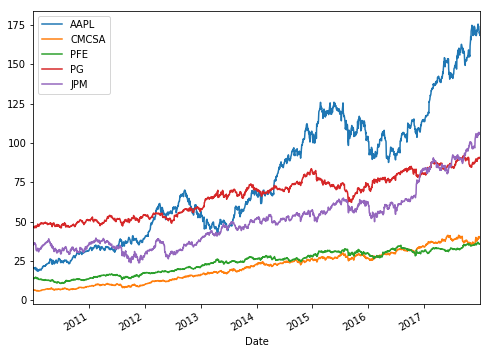

In [29]:
closes.plot(figsize=(8,6));

In [15]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [16]:
daily_ret = calc_daily_ret(closes)
daily_ret

,AAPL,CMCSA,PFE,PG,JPM
Date,,,,,
2010-01-05,0.001728,-0.013646,-0.014366,0.000327,0.019185
2010-01-06,-0.016034,-0.007194,-0.003220,-0.004755,0.005479
2010-01-07,-0.001850,0.020840,-0.003771,-0.005438,0.019615
2010-01-08,0.006626,-0.002951,0.008062,-0.001323,-0.002459
2010-01-11,-0.008861,-0.006522,0.007998,-0.003978,-0.003363
2010-01-12,-0.011440,-0.018008,-0.003192,0.011396,-0.023632
2010-01-13,0.014007,0.015625,0.023171,0.010293,0.017324
2010-01-14,-0.005809,-0.005981,0.008811,0.000975,0.009895
2010-01-15,-0.016853,-0.002403,0.005660,-0.012418,-0.022860


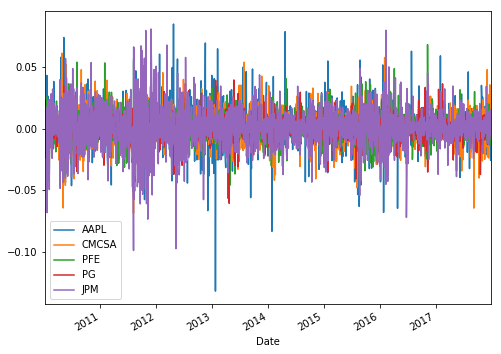

In [17]:
daily_ret.plot(figsize=(8,6));

In [18]:
tickers = ['AAPL', 'CMCSA', 'PFE', 'PG','JPM']

def def_portfolio(tickers, participation=None):
    if (participation is None):
        participation = np.ones(len(tickers))/len(tickers)    
    portfolio = pd.DataFrame({'Tickers': tickers, 'Participation': participation}, index=tickers)
    return portfolio

In [22]:
portfolio = def_portfolio(tickers, participation=[20,20,20,20,20])
portfolio

,Participation,Tickers
AAPL,20,AAPL
CMCSA,20,CMCSA
PFE,20,PFE
PG,20,PG
JPM,20,JPM


In [23]:
def calc_annual_ret(daily_ret):
    return np.exp(daily_ret.groupby(lambda date: date.year).sum())-1
def calc_monthly_ret(daily_ret):
    return np.exp(daily_ret.groupby(lambda date: '%4d-%02d'%(date.year,date.month)).sum())-1

In [24]:
annual_ret = calc_annual_ret(daily_ret)
monthly_ret = calc_monthly_ret(daily_ret)

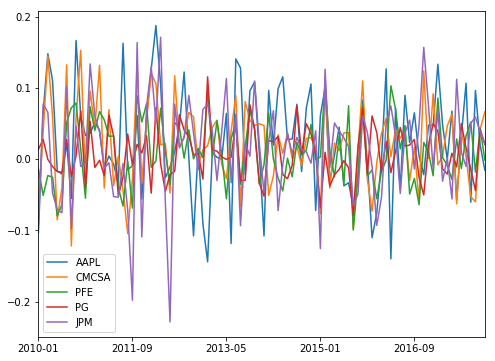

In [25]:
monthly_ret.plot(figsize=(8,6));

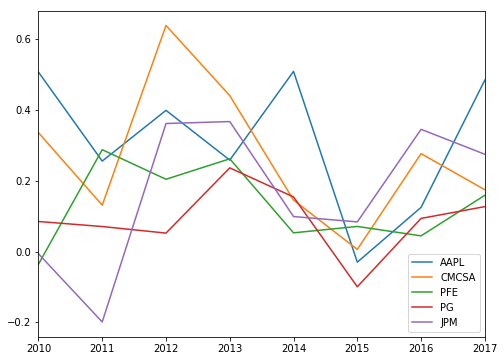

In [26]:
annual_ret.plot(figsize=(8,6));

In [27]:
def calc_portfolio_ret(portfolio, returns, name='Value'):
    total_sum = portfolio.Participation.sum()
    weight = portfolio.Participation/total_sum
    weighted_ret = returns*weight
    return pd.DataFrame({name: weighted_ret.sum(axis=1)})

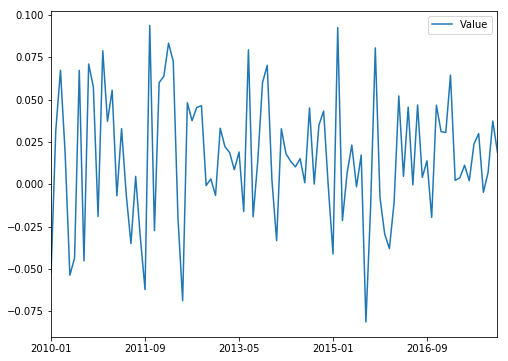

In [28]:
portfolio_ret_m = calc_portfolio_ret(portfolio, monthly_ret)
portfolio_ret_m.plot(figsize=(8,6));

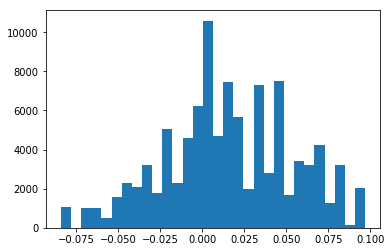

In [33]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(portfolio_ret_m)

nscen = 100000
ret_sim = kde.sample(n_samples=nscen, random_state=None)
plt.hist(ret_sim, bins=30);

In [34]:
np.mean(ret_sim)-np.percentile(ret_sim, 1)

0.095338193593298065

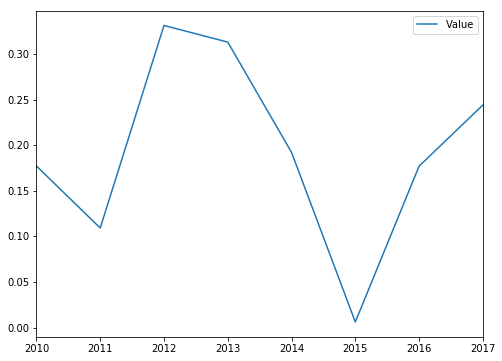

In [36]:
portfolio_ret_a = calc_portfolio_ret(portfolio, annual_ret)
portfolio_ret_a.plot(figsize=(8,6));

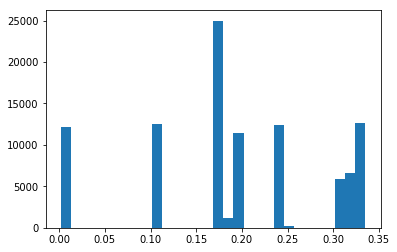

In [37]:
kde_a = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(portfolio_ret_a)
nscen = 100000
ret_sim = kde_a.sample(n_samples=nscen, random_state=None)
plt.hist(ret_sim, bins=30);

In [38]:
np.mean(ret_sim)-np.percentile(ret_sim, 5)

0.18854560291359651